In [1]:
from pathlib import Path
import pandas as pd

In [6]:
data_dir = Path("./data/sf_sub_clause/sources").resolve()
sources = {file.stem: pd.read_csv(file, sep="\t") for file in data_dir.rglob("*.tsv")}


In [8]:
categories = set()
for source in sources.values():
    for category in source['categories'].unique():
        cats = category.split("/")
        categories.update(cats)

In [9]:
def format_number(num):
    if num >= 1000:
        return f"{num/1000:.1f}k"
    return str(num)

In [10]:
plots_dir = data_dir / "plots"
plots_dir.mkdir(parents=True, exist_ok=True)

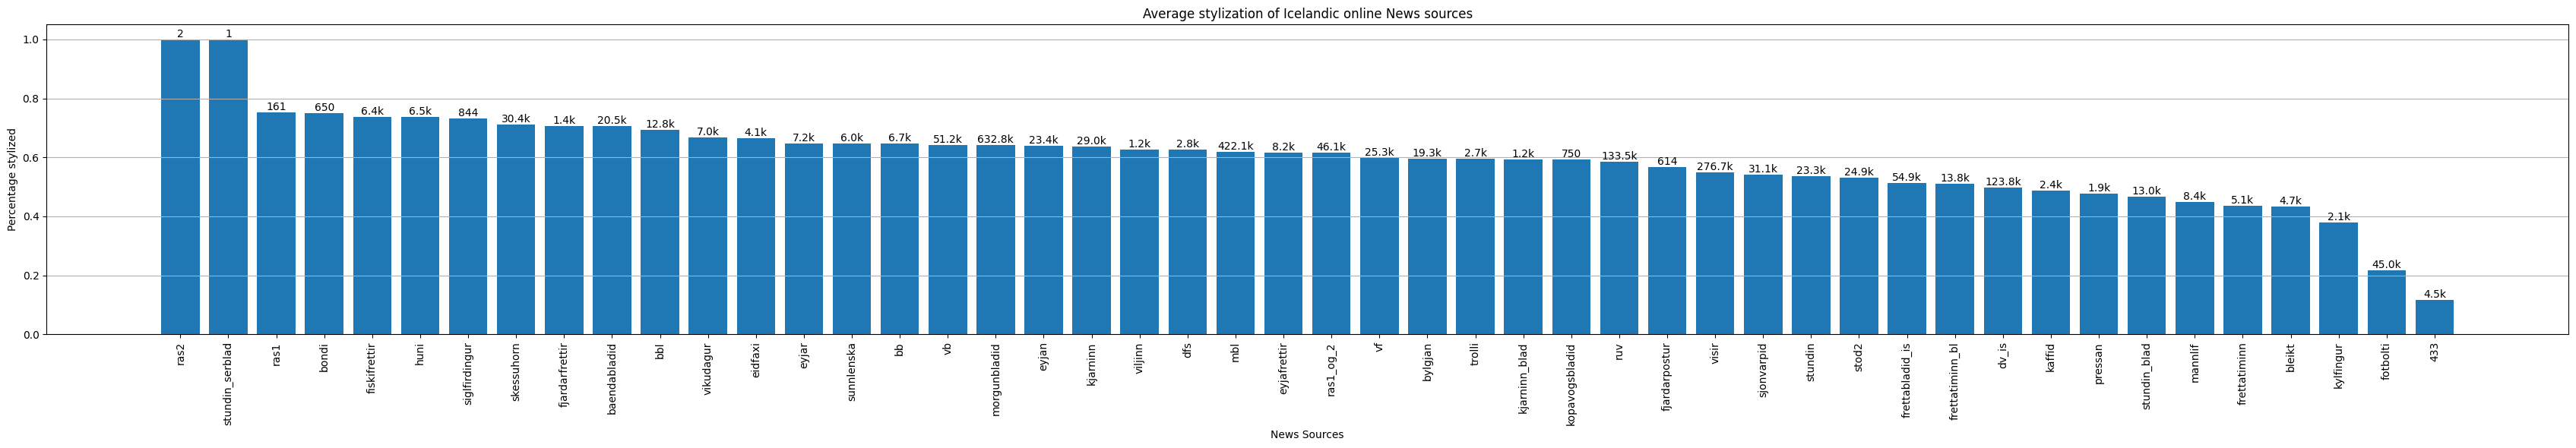

In [ ]:
import matplotlib.pyplot as plt

all_stylized = {}
lengths = {}
for source, df in sources.items():
    percentage = df['is_stylized'].sum() / len(df)
    all_stylized[source] = percentage
    lengths[source] = len(df)

all_stylized = dict(sorted(all_stylized.items(), key=lambda x: x[1], reverse=True))
sorted_lengths = {key: lengths[key] for key in all_stylized.keys()}

plt.figure(figsize=(34,6))
bars = plt.bar(all_stylized.keys(), all_stylized.values())
plt.xlabel("News Sources")
plt.ylabel("Percentage stylized")
plt.title("Average stylization of Icelandic online News sources")
plt.xticks(rotation=90)
plt.grid(axis='y')

for bar, length in zip(bars, sorted_lengths.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), format_number(length), ha='center', va="bottom")

plt.tight_layout()
plt.savefig(plots_dir / "average_stylization.png")
plt.show()

In [12]:
full_data = Path("./data/sf_sub_clause/sf_sub_clause.tsv")
all_data = pd.read_csv(full_data, sep="\t")

In [13]:
stylized_categories = []
for cat in categories:
    match = all_data[all_data['categories'].apply(lambda x: cat in x.split("/"))]
    # print(cat.capitalize())
    stylized = match['is_stylized'].sum() / len(match)
    stylized = float(f"{stylized:.3f}")
    stylized_categories.append([cat, stylized, len(match)])


In [14]:
cat_data = pd.DataFrame(stylized_categories)
# cat_data.to_csv(data_dir / "categorical_data.tsv", sep="\t", header=["category", "sf_ratio", "nr_examples"], index=False)

In [ ]:
all_data['year'] = all_data['date'].apply(lambda x: x.split("-")[0])

In [ ]:
stylized = all_data.groupby('year')['is_stylized'].sum()
total = all_data.groupby('year')['is_stylized'].count()
yearly_data = stylized / total
yearly_data = yearly_data.reset_index()
yearly_data

,year,is_stylized
0,1998,0.730957
1,1999,0.736571
2,2000,0.700274
3,2001,0.702841
4,2002,0.691080
5,2003,0.678263
6,2004,0.676129
7,2005,0.664930
8,2006,0.637292
9,2007,0.631750


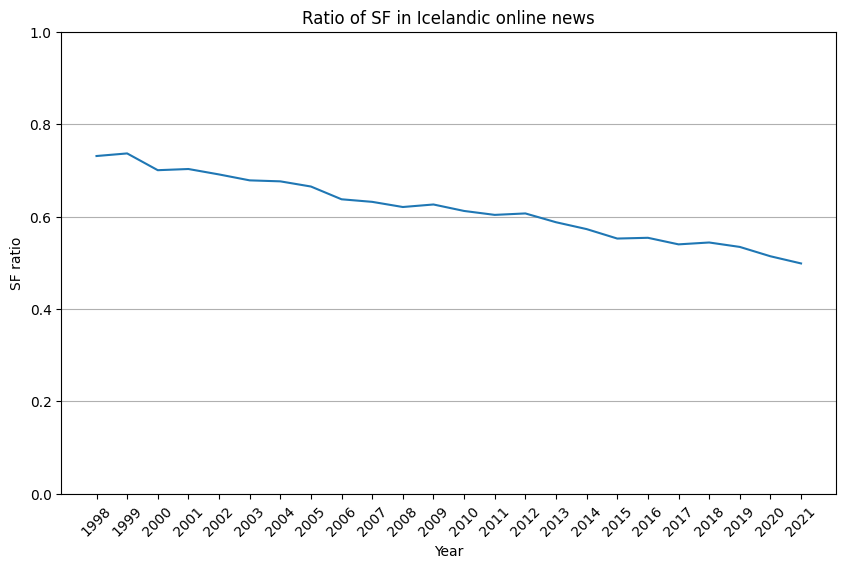

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(yearly_data['year'], yearly_data['is_stylized'])
plt.xlabel("Year")
plt.ylabel("SF ratio")
plt.title("Ratio of SF in Icelandic online news")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.grid(axis="y")
plt.show()

In [20]:
cat_data = pd.read_csv("./data/categorical_data.tsv", sep="\t")

In [25]:
cat_data.columns

Index(['category', 'sf_ratio', 'nr_examples'], dtype='object')

In [34]:
cat_data['nr_examples'].corr(cat_data['sf_ratio'])

np.float64(0.0394943215320825)

In [43]:
sx = cat_data['nr_examples'].std()
sy = cat_data['sf_ratio'].std()
x_mean = cat_data['nr_examples'].mean()
y_mean = cat_data['sf_ratio'].mean()

sample_sum = sum([(row[2] - x_mean)*(row[1] - y_mean) for i, row in cat_data.iterrows()])

/var/folders/w7/x67zbqcs11gdqkf49d028ycw0000gn/T/ipykernel_63669/1828036852.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_sum = sum([(row[2] - x_mean)*(row[1] - y_mean) for i, row in cat_data.iterrows()])


In [46]:
sample_sum / ((len(cat_data) - 1) * sx * sy)

np.float64(0.03949432153208249)